##### Figure S9: visualizing sweepfinder outlier windows near the histone cluster near 340 Mb on chrom 3

In [1]:
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd

import itertools

import ingenos

In [2]:
base_path = "/overflow/dschridelab/users/rrlove/aedes/"
results_path = f"{base_path}results/"

In [3]:
chroms = ["AaegL5_1", "AaegL5_2", "AaegL5_3"]
countries = ["Brazil", "Colombia", "Gabon", "Kenya", "Senegal", "USA"]

##### read in the genes, for plotting

In [4]:
gff3 = pd.read_table(f"{base_path}refs/aegy/VectorBase-54_AaegyptiLVP_AGWG.gff",
                     sep="\t", comment="#", header=None)

gff3.columns = ["seqid", "source", "type", "start", "end", "score", "strand",
               "phase", "attributes"]

gff3["name"] = gff3["attributes"].str.split(";", expand=True)[0].str.lstrip("ID=")

gff3.head()

,seqid,source,type,start,end,score,strand,phase,attributes,name
0,AaegL5_3,VEuPathDB,protein_coding_gene,157422094,157471671,.,-,.,ID=AAEL010223;description=phosphatidylserine d...,AAEL010223
1,AaegL5_3,VEuPathDB,mRNA,157422094,157436357,.,-,.,ID=AAEL010223-RB;Parent=AAEL010223;Note=4.1.1....,AAEL010223-RB
2,AaegL5_3,VEuPathDB,mRNA,157422094,157436356,.,-,.,ID=AAEL010223-RF;Parent=AAEL010223;Note=4.1.1....,AAEL010223-RF
3,AaegL5_3,VEuPathDB,mRNA,157422094,157436399,.,-,.,ID=AAEL010223-RD;Parent=AAEL010223;Note=4.1.1....,AAEL010223-RD
4,AaegL5_3,VEuPathDB,mRNA,157422094,157471670,.,-,.,ID=AAEL010223-RE;Parent=AAEL010223;Note=4.1.1....,AAEL010223-RE


In [5]:
genes = gff3.loc[gff3["type"] == "protein_coding_gene"]

genes.shape

(14718, 10)

##### read in the sweepfinder outliers

In [6]:
outliers_dict = {}

for country in countries:
    
    in_path = \
    f"{results_path}sweepfinder/genes/gowinda_inputs/{country}/{country}_99pct_outliers.121322.csv"
        
    threshold = "99"
    
    in_table = pd.read_table(
        in_path, header=None, skiprows=1,
        names = ["chrom", "location", "LR", "alpha", "country"])
        
    in_table["country"] = country

    in_table["threshold"] = threshold

    in_table["location"] = in_table["location"].map(int)

    in_table["LR"] = in_table["LR"].map(float)

    outliers_dict[country] = in_table

##### plot outliers near the histone genes on chromosme 3, and all nearby genes

In [7]:
row_1_starts = itertools.cycle([0.05, 0.12, 0.19])

row_2_starts = itertools.cycle([0.55, 0.62, 0.69])

cmap = plt.get_cmap("tab10")

In [8]:
outString = ingenos.make_date_stamp(
    results_path + "popgen/chrom_3_histone_sweep", ".pdf")

outString

'/overflow/dschridelab/users/rrlove/aedes/results/popgen/chrom_3_histone_sweep.020923.pdf'

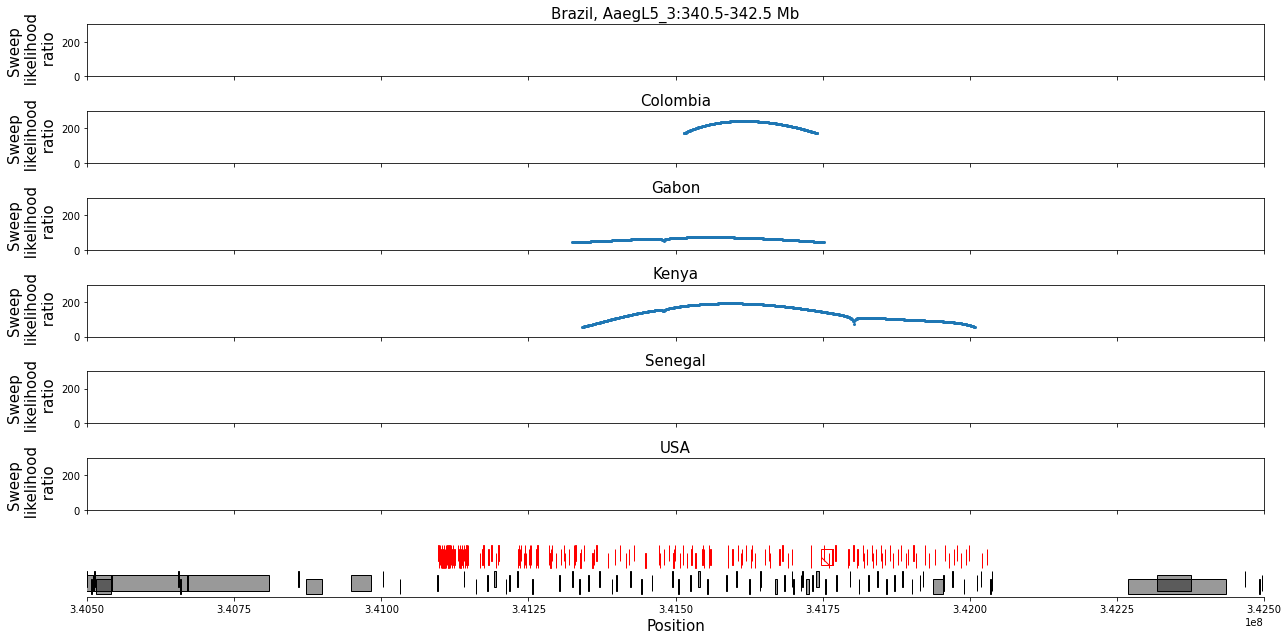

In [9]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(18,9), 
                         sharex="col")

chrom = "AaegL5_3"

for i, country in enumerate(countries):
        
    df = outliers_dict[country]
                
    ax = axes[i]

    chunk = df.loc[df["chrom"] == chrom]
    
    ax.set_xlim(340500000, 342500000)
    
    ax.set_ylim(0, 300)

    ax.plot(chunk["location"], chunk["LR"], marker="o", 
            linestyle = " ", markersize=2)
    
    ax.set_ylabel("Sweep\n likelihood\n ratio", fontsize=15)
    
    if i == 0:
        
        ax.set_title(f"{country}, AaegL5_3:340.5-342.5 Mb", fontsize=15)
    
    else:
        
        ax.set_title(country, fontsize=15)
    
chunk = genes.loc[((genes["seqid"] == "AaegL5_3")&\
                   (genes["start"] > 335000000) &\
                     (genes["start"] < 350000000))]

for idx, row in chunk.sort_values("start").iterrows():

    gene_length = row["end"] - row["start"]
        
    if "histone" in row["attributes"] or "Histone" in row["attributes"]:

        start = next(row_2_starts)
        
        rect = patches.Rectangle((row["start"], start), gene_length, 0.3, 
                                 linewidth=1,
                            edgecolor = colors.to_rgba("red", 1), 
                                 facecolor = colors.to_rgba("white", 0),
                                hatch = "\\")                       
    else:
        
        start = next(row_1_starts)

        rect = patches.Rectangle((row["start"], start), gene_length, 0.3, 
                                 linewidth=1,
                            edgecolor = colors.to_rgba("black", 1), 
                                 facecolor = colors.to_rgba("black", 0.4))
 
    axes[-1].add_patch(rect)

axes[-1].get_yaxis().set_visible(False)
axes[-1].spines["left"].set_visible(False)
axes[-1].spines["right"].set_visible(False)
axes[-1].spines["top"].set_visible(False)
axes[-1].set_xlabel("Position", fontsize=15)

plt.tight_layout()

#plt.savefig(outString, bbox_inches="tight")